In [ ]:
# !pip3 install tensorflow
# !pip3 install keras

## Visualize feature maps from VCG layers

In [1]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot as plt
import numpy as np
from numpy import expand_dims

2024-12-03 02:39:15.760744: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-03 02:39:15.764252: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-03 02:39:15.774386: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733193555.789678   11040 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733193555.794303   11040 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-03 02:39:15.813212: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

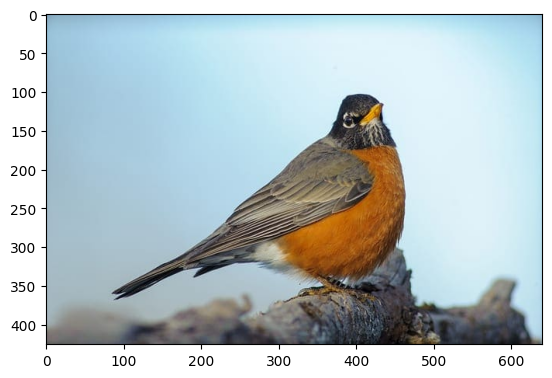

In [4]:
img = load_img('imgs/bird.jpg')
plt.imshow(img)

In [17]:
def visualize_vcg_layers(img):
    # load the model
    model = VGG16()
    # redefine model to output right after the first hidden layer
    ixs = [2, 5, 9, 13, 17]
    outputs = [model.layers[i].output for i in ixs]
    model = Model(inputs=model.inputs, outputs=outputs)
    # expand dimensions so that it represents a single 'sample'
    img = expand_dims(img, axis=0)
    # prepare the image (e.g. scale pixel values for the vgg)
    img = preprocess_input(img)
    # get feature map for first hidden layer
    feature_maps = model.predict(img)
    # plot the output from each block
    square = 8
    for fmap in feature_maps:
        # plot all 64 maps in an 8x8 squares
        ix = 1
        for _ in range(square):
            for _ in range(square):
                # specify subplot and turn of axis
                ax = plt.subplot(square, square, ix)
                ax.set_xticks([])
                ax.set_yticks([])
                # plot filter channel
                plt.imshow(fmap[0, :, :, ix-1])
                ix += 1
        # show the figure
        plt.show()

/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_23']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step


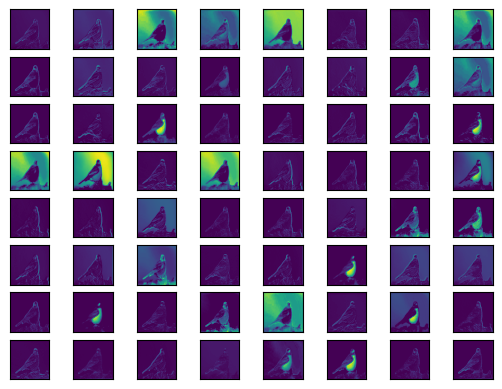

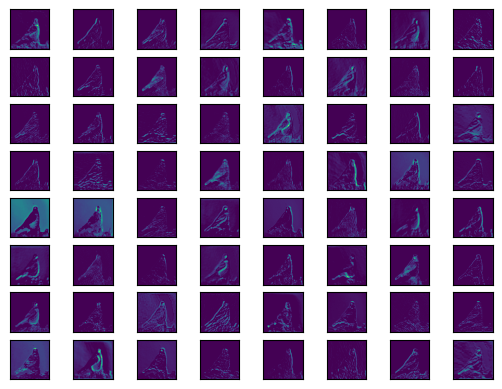

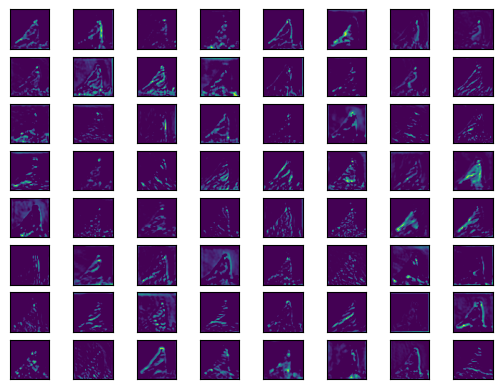

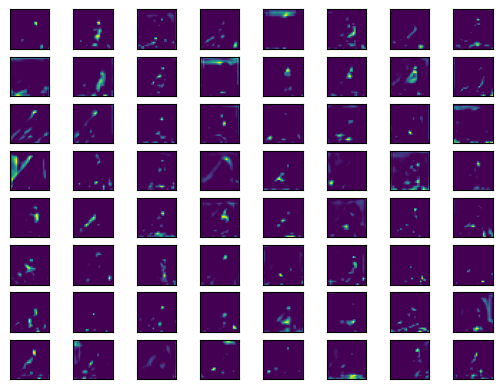

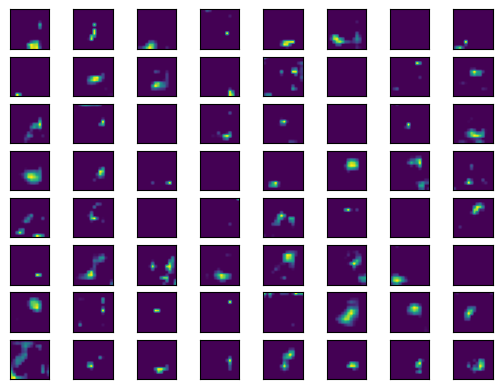

In [18]:
img = load_img('imgs/bird.jpg', target_size=(224, 224))
img = img_to_array(img)
visualize_vcg_layers(img)

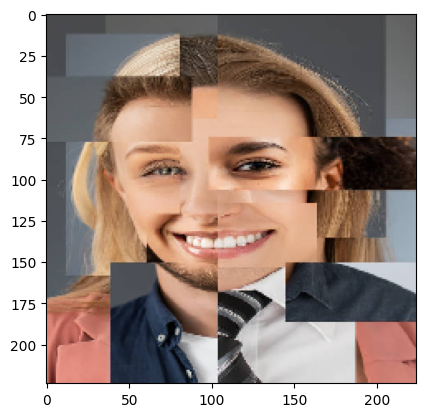

In [19]:
img = load_img('imgs/mosaic_face.jpg', target_size=(224, 224))
plt.imshow(img)

/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_46']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


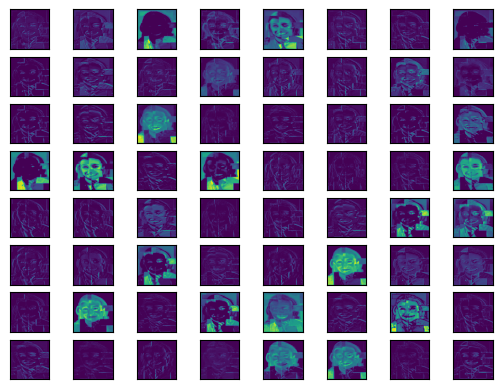

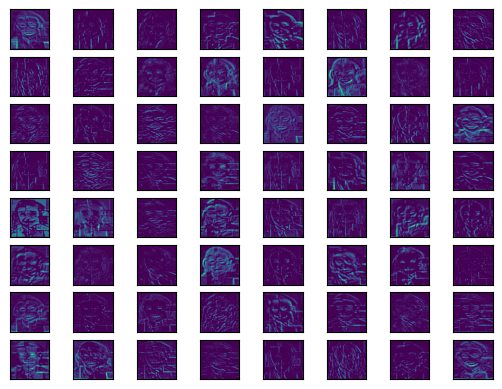

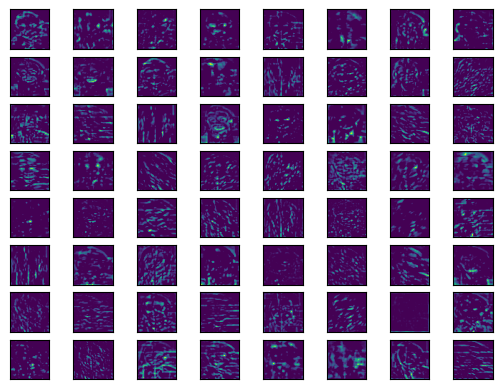

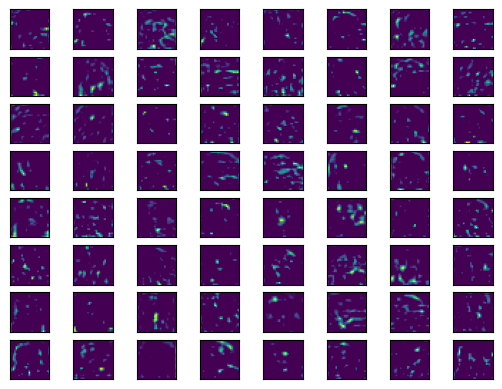

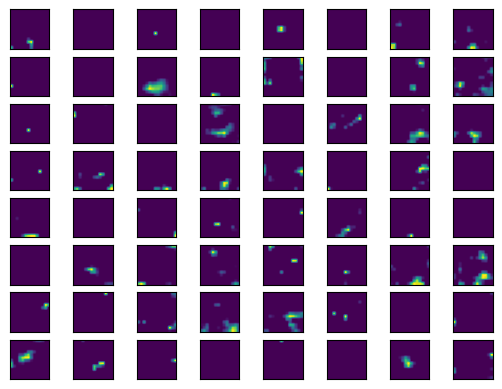

In [20]:
visualize_vcg_layers(img)

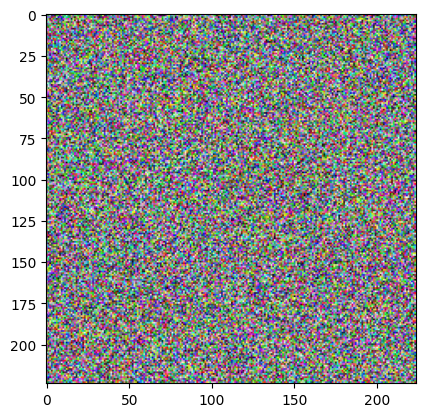

In [21]:
random_noise_image = np.random.rand(224, 224, 3)
plt.imshow(random_noise_image)

/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_69']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step


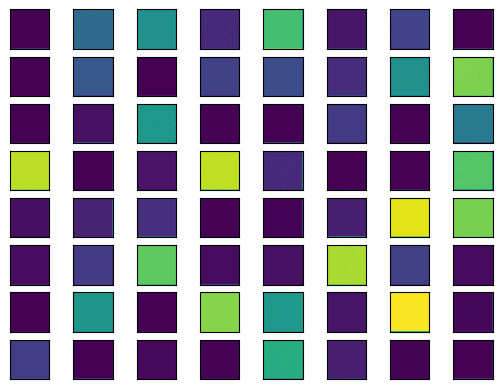

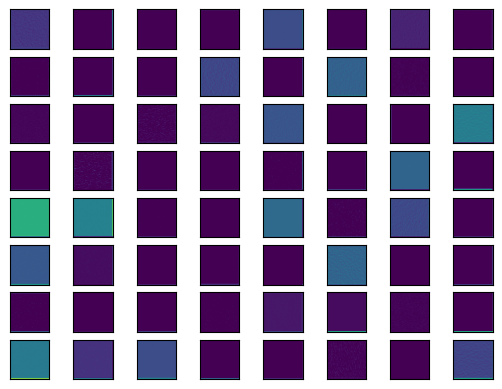

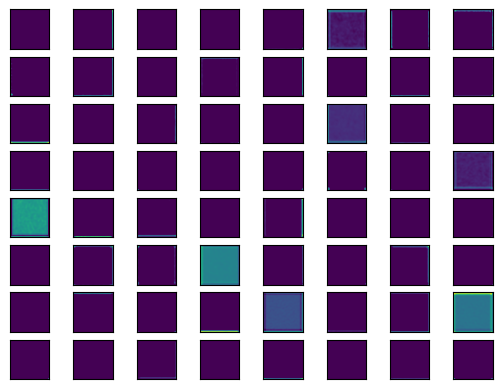

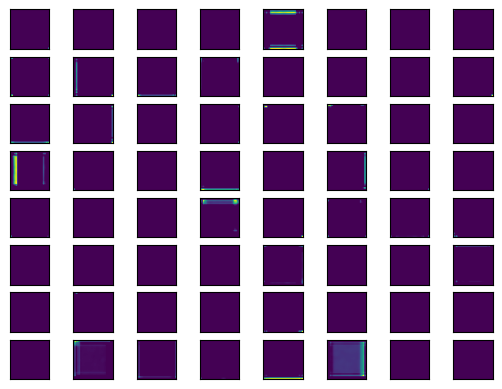

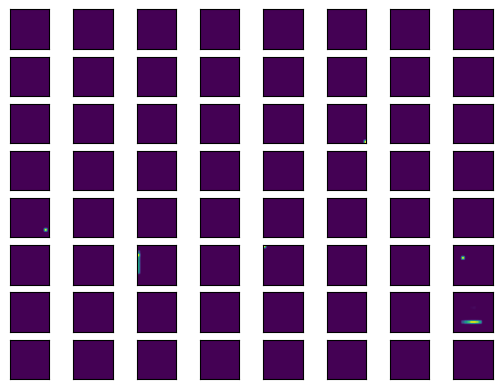

In [22]:
visualize_vcg_layers(random_noise_image)

## Try feature map upscaling

In [26]:
model = VGG16()
model = Model(inputs=model.inputs, outputs=model.layers[2].output)
img = load_img('imgs/mosaic_face.jpg', target_size=(224, 224))
img = img_to_array(img)
img = expand_dims(img, axis=0)
img = preprocess_input(img)
feature_maps = model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_115']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

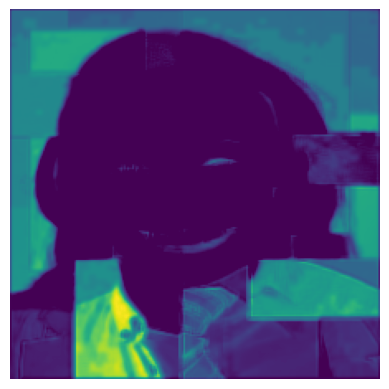

In [ ]:
# choose a random feature map 
plt.imshow(feature_maps[0, :, :, 2])
plt.axis('off')

In [ ]:
# %pip install diffusers
# %pip install transformers
# %pip install accelerate

In [2]:
import requests
from PIL import Image
from io import BytesIO
from diffusers import StableDiffusionUpscalePipeline
import torch
import transformers


/home/codespace/.python/current/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# load model and scheduler
model_id = "stabilityai/stable-diffusion-x4-upscaler"
pipeline = StableDiffusionUpscalePipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipeline = pipeline.to("cpu")

Loading pipeline components...:  17%|█▋        | 1/6 [00:00<00:01,  4.30it/s]

Loading pipeline components...: 100%|██████████| 6/6 [00:26<00:00,  4.45s/it]
Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, due to the lack of support for`float16` operations on this device in PyTorch. Please, remove the `torch_dtype=torch.float16` argument, or use another device for inference.
Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, due to the lack of support for`float16` operations on this device in PyTorch. Please, remove the `torch_dtype=torch.float16` argument, or use another device for inference.
Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fai

In [ ]:
url = "https://huggingface.co/datasets/hf-internal-testing/diffusers-images/resolve/main/sd2-upscale/low_res_cat.png"
response = requests.get(url)
low_res_img = Image.open(BytesIO(response.content)).convert("RGB")
low_res_img = low_res_img.resize((128, 128))

prompt = 'increase details and enhance sharpness'
upscaled_image = pipeline(prompt=prompt, image=low_res_img).images[0]

  0%|          | 0/75 [00:00<?, ?it/s]